In [3]:
%load_ext autoreload
%autoreload 2
# Preprocess
import os
import shutil

from spatz.utils.preprocess import preprocess_file


PATH = 'data/simulations/'

# Delete the old folder of preprocessed files.
if os.path.isdir(PATH + 'temp/'):
    shutil.rmtree(PATH + 'temp/')

# Create the folder again.
os.mkdir(PATH + 'temp/')

# Preprocess the files.
for file in os.listdir(PATH):
    if not os.path.isdir(PATH + file) and '.txt' in file:
        df = preprocess_file(PATH + file)
        df.to_csv(PATH + 'temp/' + file.replace('.txt', '.csv'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from spatz.simulation import Simulation, UniformTimeSteps

# Construct a time model.
timesteps = UniformTimeSteps(0.1, mu=0, sigma=0, delay_only=True)

# Construct a simulation instance with the time model.
simulation = Simulation(timesteps)

ModuleNotFoundError: No module named 'numpy.typing'

In [13]:
#Setup Sensors / observers

from spatz.sensors.antenna.tx_gain import AntennaTxGain

altitude = simulation.add_observer(['altitude'])
latitude = simulation.add_observer(['latitude'])
longitude = simulation.add_observer(['longitude'])

x = simulation.add_observer(['x'])
y = simulation.add_observer(['y'])
z = simulation.add_observer(['z'])

antenna_tx_gain_sensor = simulation.add_sensor(AntennaTxGain)

simulation.load(PATH + 'temp/' + '13_5DrougeOnly.csv')
logger = simulation.get_logger()



In [21]:
# Run simulation
for step, t, dt in simulation.run(verbose=True):
    # Get the sensor data for the current time
    gain = antenna_tx_gain_sensor()
    
    
    # Get the correct altitude data.
    altitude()
    latitude()
    longitude()

    x()
    y()
    z()

100%|█████████▉| 299.9999999999997/300.0 [00:04<00:00, 70.82it/s] 


In [22]:
df = logger.get_dataframe()
df

time Generic Antenna TX/out general/altitude general/latitude  \
0        0.0                   <NA>             <NA>             <NA>   
1        0.1                      0       319.189854         1.184825   
2        0.2                      0       319.754649         1.184825   
3        0.3                      0       320.689767         1.184825   
4        0.4                      0        321.98961         1.184825   
...      ...                    ...              ...              ...   
2996   299.6                      0       954.385196         1.186267   
2997   299.7                      0       950.544731         1.186267   
2998   299.8                      0       946.704266         1.186267   
2999   299.9                      0         942.8638         1.186267   
11999  300.0                      0       939.023335         1.186267   

      general/longitude general/x    general/y   general/z  
0                  <NA>      <NA>         <NA>        <NA>  
1              0.367914       0.0     0.033017    0.189854  
2              0.367914       0.0     0.131239    0.754649  
3              0.367914       0.0     0.293862    1.689767  
4              0.367914       0.0     0.519914     2.98961  
...                 ...       ...          ...         ...  
2996           0.367917  7.639079  9218.178485  628.737611  
2997           0.367917  7.639903  9218.177327  624.897143  
2998           0.367917  7.640726  9218.176168  621.056675  
2999           0.367917   7.64155  9218.175009  617.216207  
11999          0.367917  7.642373   9218.17385   613.37574  

[3001 rows x 8 columns]

In [10]:
import matplotlib.pyplot as plt

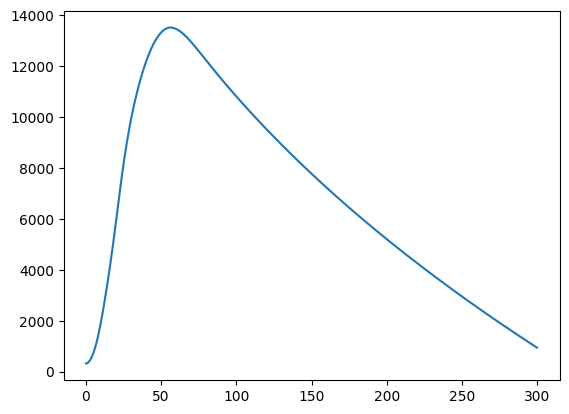

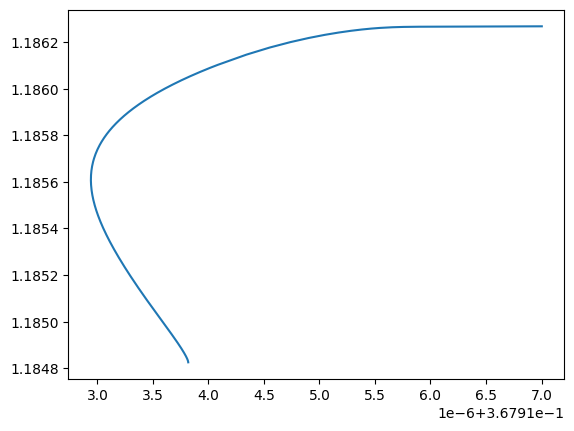

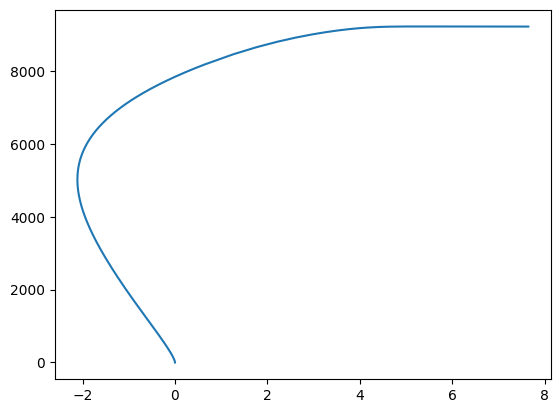

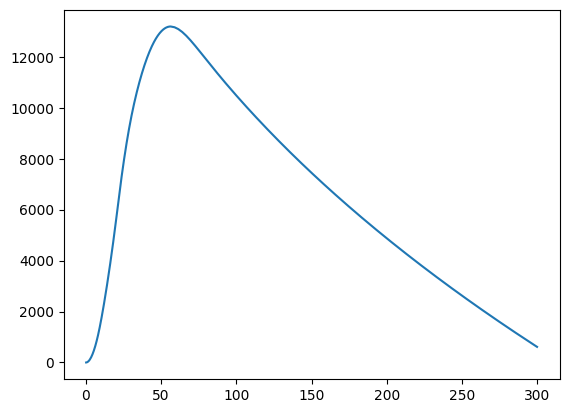

In [26]:

plt.plot(df['time'][1:], df['general/altitude'][1:], label='general/altitude')
plt.show()


plt.plot(df['general/longitude'][1:],df['general/latitude'][1:])
plt.show()


plt.plot(df['general/x'][1:],df['general/y'][1:])
plt.show()


plt.plot(df['time'][1:], df['general/z'][1:], label='general/z')
plt.show()

In [1]:
from spatz.sensors.antenna.tx_gain import GainPattern

GainPattern('data/gain_pattern/testpattern.txt')

    Theta [deg.]  Phi   [deg.]  Abs(Gain)[dBi   ]   Abs(Theta)[dBi   ]  Phase(Theta)[deg.]  Abs(Phi  )[dBi   ]  Phase(Phi  )[deg.]  Ax.Ratio[dB    ]    
0    -180.000         -90.000           -7.508e+00 ...                                                                                                  
1    -170.000         -90.000           -7.301e+00 ...                                                                                                  
2    -160.000         -90.000           -6.016e+00 ...                                                                                                  
3    -150.000         -90.000           -5.240e+00 ...                                                                                                  
4    -140.000         -90.000           -5.454e+00 ...                                                                                                  
..                                                 ...                            